# EDA Introduction

Good day we are the __Dadris__! <3

This notebook serves as the collation of our exploratory data analysis for our study, _The Regional Crime Puzzle: Analyzing Poverty and Employment as Predictors of Crime Rates in the Philippines_.

# Data Preprocessing

As we are dealing with employment, poverty, and crime rate percentages across the Philippine regions, we need to clean and preprocess them separately. In doing so, we ensure the integrity of our data and thus our results & findings at the end of the study! As we already have our unified data set under _./data/main.csv_, we shall dissect this to confirm that our data remains consistent with discussions in the data's nature.

## Import Libraries

In [4]:
%pip install scikit-learn
%pip install statsmodels

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import pearsonr, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.colors import ListedColormap


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 11.5 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Loading the unified data set (csv)

The _./data/main.csv_ file contains the unified data set, which contains:

1. Poverty dataset - 54 regional samples (sparsity due to quarterly collected data; thus only 2018, 2021, 2023 poverty statistics available)

2. Employment dataset - 102 regional samples (complete from 2018 to 2023)

3. Crime rate dataset - 112 regional samples (complete from 2018 to 2023 & 2025; lacks 2019 and 2024 i.e. no available open-sourced data)

In [5]:
unified_df = pd.read_csv('./data/main.csv')

## Data Understanding

Let us first look further at the surface information regarding the unified dataset

In [6]:
#print(unified_df.info())
#print(unified_df.describe())
#print(unified_df.isnull().sum())
#print(unified_df.dtypes)
print(unified_df.shape)
unified_df.head(10)

(119, 24)


,year,region,population_estimate_15_over,population_standard_error,population_cov,labor_force_estimate,labor_force_standard_error,labor_force_cov,labor_force_participation_rate_estimate,labor_force_participation_rate_standard_error,...,poverty_urban_cov,poverty_urban_standard_error,poverty_rural,poverty_rural_cov,poverty_rural_standard_error,index_crime,index_crime_clear,nonindex_crime,nonindex_crime_clear,crime_sovled_total
0,2018,ncr,"9,186",NaN,NaN,"5,538",NaN,NaN,60.3,NaN,...,11.77,36.67,NaN,NaN,NaN,"14,650","11,105","130,419","120,192","38,216"
1,2018,car,"1,270",NaN,NaN,786,NaN,NaN,61.9,NaN,...,17.98,4.56,188.93,5.59,10.56,"1,159",836,"6,021","4,996","2,349"
2,2018,1,"3,520",NaN,NaN,"2,172",NaN,NaN,61.7,NaN,...,26.23,17.90,441.72,10.04,44.36,"2,910","2,005","28,320","26,397","16,012"
3,2018,2,"2,403",NaN,NaN,"1,535",NaN,NaN,63.9,NaN,...,23.09,17.54,503.16,6.73,33.87,"2,389","2,052","9,197","8,921","4,541"
4,2018,3,"7,889",NaN,NaN,"4,722",NaN,NaN,59.9,NaN,...,9.93,39.42,440.84,9.02,39.75,"6,688","5,398","36,315","33,340","15,760"
5,2018,4a,"10,096",NaN,NaN,"6,328",NaN,NaN,62.7,NaN,...,11.09,56.41,603.26,9.99,60.29,"8,312","6,350","38,741","34,492","22,033"
6,2018,4b,"2,093",NaN,NaN,"1,298",NaN,NaN,62.0,NaN,...,15.58,18.87,348.16,7.15,24.89,"1,427","1,210","5,368","4,931","4,511"
7,2018,5,"4,113",NaN,NaN,"2,503",NaN,NaN,60.9,NaN,...,15.69,34.90,"1,413.47",4.22,59.71,"4,934","2,519","20,501","16,915","8,099"
8,2018,6,"5,459",NaN,NaN,"3,343",NaN,NaN,61.2,NaN,...,17.94,9.13,601.72,7.05,42.42,"5,030","3,783","22,870","19,277","11,466"
9,2018,7,"5,295",NaN,NaN,"3,248",NaN,NaN,61.3,NaN,...,12.85,41.50,671.88,8.48,56.98,"13,637","7,155","50,780","42,160","26,750"


Apart from the shape of the data, let's examine other surface information as well!

In [7]:
print(unified_df.describe())

              year  population_standard_error  population_cov  \
count   119.000000                  34.000000       34.000000   
mean   2021.142857                 172.270794        3.926111   
std       2.240935                 104.880969        0.574592   
min    2018.000000                  43.132000        2.477922   
25%    2019.000000                 111.134000        3.700297   
50%    2021.000000                 132.122000        3.817814   
75%    2023.000000                 212.670250        4.107289   
max    2025.000000                 483.972000        5.103737   

       labor_force_standard_error  labor_force_cov  \
count                   34.000000        34.000000   
mean                   115.300029         4.072136   
std                     66.839917         0.584994   
min                     29.093000         2.510872   
25%                     82.289500         3.861007   
50%                     93.391500         3.986366   
75%                    137.612500   

In [8]:
print(unified_df.isnull().sum())

year                                                  0
region                                                0
population_estimate_15_over                          17
population_standard_error                            85
population_cov                                       85
labor_force_estimate                                 17
labor_force_standard_error                           85
labor_force_cov                                      85
labor_force_participation_rate_estimate              17
labor_force_participation_rate_standard_error        85
labor_force_participation_rate_standard_error_cov    85
employment_rate                                      17
unemployment_rate                                    17
poverty_urban                                        68
poverty_urban_cov                                    68
poverty_urban_standard_error                         68
poverty_rural                                        71
poverty_rural_cov                               

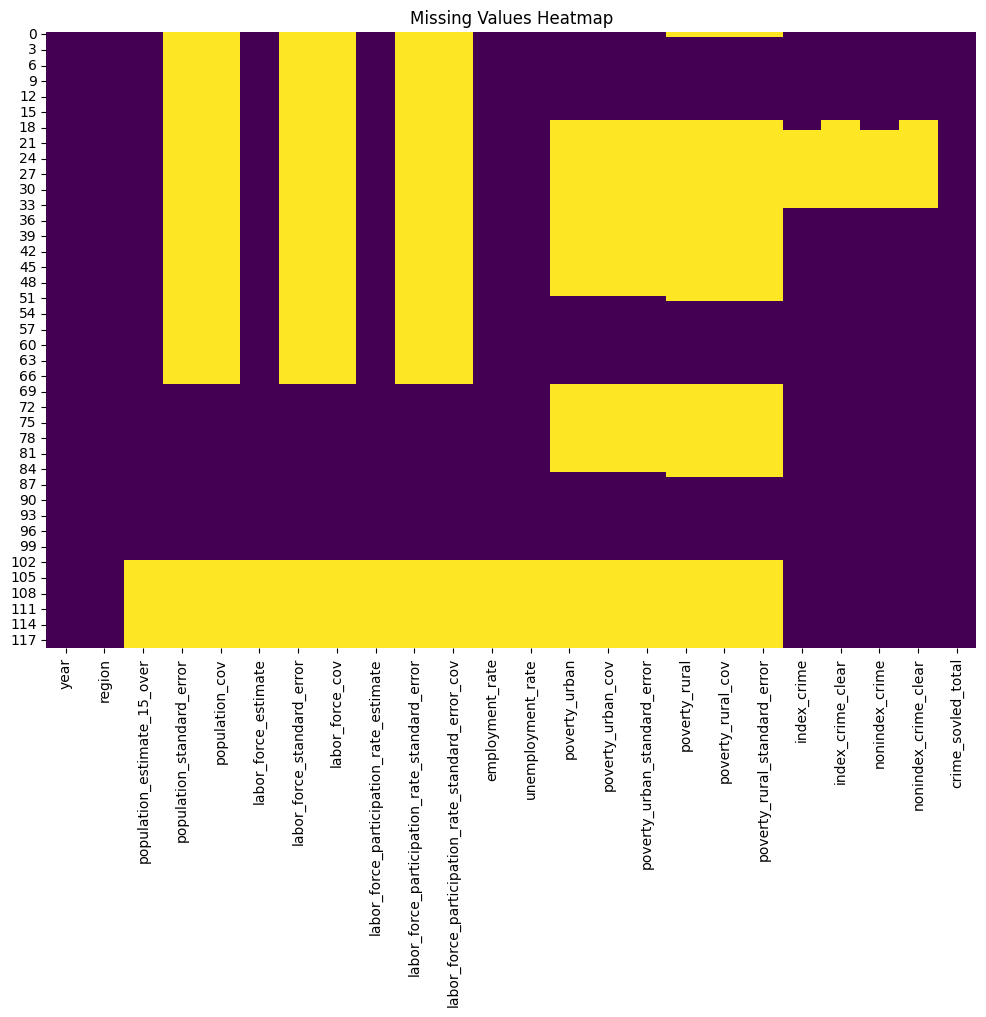

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(unified_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
print(unified_df.dtypes)

year                                                   int64
region                                                object
population_estimate_15_over                           object
population_standard_error                            float64
population_cov                                       float64
labor_force_estimate                                  object
labor_force_standard_error                           float64
labor_force_cov                                      float64
labor_force_participation_rate_estimate              float64
labor_force_participation_rate_standard_error        float64
labor_force_participation_rate_standard_error_cov    float64
employment_rate                                      float64
unemployment_rate                                    float64
poverty_urban                                        float64
poverty_urban_cov                                    float64
poverty_urban_standard_error                         float64
poverty_rural           

From these, we could see that the dataset has 119 rows and 24 columns. More so, the missing observations/rows' amount is consistent as to what was expected due to the inavailability of specific open-sourced datasets, particulary in poverty and crime rates. Also, some columns are objects instead of integers/floats, so we must convert those to, i.e., `population_estimate_15_over`, `population_standard_error`, `labor_force_estimate`, `poverty_rural`, `index_crime`, `index_crime_clear`, `nonindex_crime`, `nonindex_crime_clear`, and `crime_sovled_total`. Apart from these, some columns may be extraneous to our study, so we can omit those and create a better & reinforced unified dataset. This reinforced dataset would be the dataset to be used for further exploration & the basis of conclusive claims in our study!

## Data Preparation

Time to cook our reinforced unified dataset!

### a. Data Conversion to reinforced dataset

In [11]:
cols_to_convert = [
    'population_estimate_15_over',
    'population_standard_error',
    'labor_force_estimate',
    'poverty_rural',
    'index_crime',
    'index_crime_clear',
    'nonindex_crime',
    'nonindex_crime_clear',
    'crime_sovled_total',
]

# Clean up commas and convert to numeric
for col in cols_to_convert:
    unified_df[col] = (
        unified_df[col]
        .astype(str)                # make sure they're strings
        .str.replace(',', '', regex=False)  # remove commas
        .str.replace(' ', '', regex=False)  # remove any stray spaces
    )
    unified_df[col] = pd.to_numeric(unified_df[col], errors='coerce')

# Dropping extraneous columns
cols_to_drop = ['population_standard_error', 
                'population_cov',
                'labor_force_estimate',
                'labor_force_standard_error',
                'labor_force_cov',
                'labor_force_participation_rate_estimate',
                'labor_force_participation_rate_standard_error',
                'labor_force_participation_rate_standard_error_cov',
                'poverty_urban_cov',
                'poverty_urban_standard_error',
                'poverty_rural_cov',
                'poverty_rural_standard_error',
                'index_crime_clear', 
                'nonindex_crime_clear'
                ]

unified_df.rename(columns={'crime_sovled_total': 'total_crime_solved'}, inplace=True)

reinforced_df = unified_df.drop(columns=cols_to_drop)

print("Reinforced DataFrame Shape:", reinforced_df.shape)
reinforced_df

print(reinforced_df.dtypes)

Reinforced DataFrame Shape: (119, 10)
year                             int64
region                          object
population_estimate_15_over    float64
employment_rate                float64
unemployment_rate              float64
poverty_urban                  float64
poverty_rural                  float64
index_crime                    float64
nonindex_crime                 float64
total_crime_solved               int64
dtype: object


In [12]:
# Check if types are consistent after conversion

print(f"Reinforced dataset types:\n{reinforced_df.dtypes}")

# Along with this, check if there are any duplicate rows (shouldn't be any in a well-constructed dataset)

print("\nDuplicate check:",  reinforced_df.duplicated().sum())

Reinforced dataset types:
year                             int64
region                          object
population_estimate_15_over    float64
employment_rate                float64
unemployment_rate              float64
poverty_urban                  float64
poverty_rural                  float64
index_crime                    float64
nonindex_crime                 float64
total_crime_solved               int64
dtype: object

Duplicate check: 0


### b. Detecting and handling (possible) outliers

In [13]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    outlier_indices = np.where(z_scores > threshold)
    outlier_rows = set(outlier_indices[0])
    return outlier_rows

print("Detecting outliers using Z-score method...")

outlier_rows = detect_outliers_zscore(reinforced_df)
print(f"Number of outlier rows detected: {len(outlier_rows)}")

if len(outlier_rows) > 0:   
    print("Outlier rows indices:", outlier_rows)
    # Optionally, we can remove outliers
    reinforced_df_cleaned = reinforced_df.drop(index=outlier_rows)
    print("Shape after removing outliers:", reinforced_df_cleaned.shape)
else:
    reinforced_df_cleaned = reinforced_df
    print("No outliers detected. Shape remains the same.") 

Detecting outliers using Z-score method...
Number of outlier rows detected: 2
Outlier rows indices: {51, 85}
Shape after removing outliers: (117, 10)


__Great!__ No outliers detected using the dataset's individual z-score w.r.t. mean and standard deviation. To be more sure, let's try detecting outliers using Interquartile Range (IQR).

In [14]:
def detect_outliers_iqr(data):
    Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
    Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                         (data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))
    outlier_rows = outlier_condition.any(axis=1)
    return data[outlier_rows]

outliers_iqr = detect_outliers_iqr(reinforced_df)
print(f"Number of outlier rows detected using IQR method: {outliers_iqr.shape[0]}")
if outliers_iqr.shape[0] > 0:
    print("Outlier rows detected using IQR method:\n", outliers_iqr)
else:
    print("No outliers detected using IQR method.")

Number of outlier rows detected using IQR method: 22
Outlier rows detected using IQR method:
     year region  population_estimate_15_over  employment_rate  \
0   2018    ncr                     9186.000             93.4   
4   2018      3                     7889.000             94.2   
5   2018     4a                    10096.000             93.4   
9   2018      7                     5295.000             94.7   
16  2018  barmm                     2390.000             96.2   
17  2019    ncr                     9758.000             94.0   
22  2019     4a                    10737.000             93.8   
26  2019      7                     5322.000             94.8   
34  2020    ncr                     9938.000             88.3   
36  2020      1                     3545.000             86.6   
38  2020      3                     8576.000             86.9   
39  2020     4a                    11097.000             88.4   
51  2021    ncr                    10107.000             89.4

Oh. There seems to be some outliers using IQR... Let's inspect those 13 detected rows to determine if they really are significant!

In [15]:
cols = ['population_estimate_15_over', 'employment_rate', 'unemployment_rate',
        'poverty_urban', 'poverty_rural', 'index_crime', 'nonindex_crime']

# Detect all outliers once using your function
outliers_iqr = detect_outliers_iqr(reinforced_df)

# Loop through each column and display which rows were flagged
for col in cols:
    print(f"\n--- {col.upper()} ---")
    flagged_rows = outliers_iqr[['region', 'year', col]]
    if not flagged_rows.empty:
        print(flagged_rows)
    else:
        print("No outliers detected in this column.")


--- POPULATION_ESTIMATE_15_OVER ---
   region  year  population_estimate_15_over
0     ncr  2018                     9186.000
4       3  2018                     7889.000
5      4a  2018                    10096.000
9       7  2018                     5295.000
16  barmm  2018                     2390.000
17    ncr  2019                     9758.000
22     4a  2019                    10737.000
26      7  2019                     5322.000
34    ncr  2020                     9938.000
36      1  2020                     3545.000
38      3  2020                     8576.000
39     4a  2020                    11097.000
51    ncr  2021                    10107.000
56     4a  2021                    11391.000
60      7  2021                     5538.000
64     11  2021                     3645.000
68    ncr  2022                    10217.109
73     4a  2022                    11668.264
85    ncr  2023                    10320.522
89      3  2023                     9143.003
90     4a  2023   

From the IQR-based outlier detection, the identified values do not appear to be extreme or implausible within the context of the dataset. The flagged observations are likely due to natural year-to-year or regional variations rather than true anomalies.

Additionally, the presence of NaN values is expected given the nature of the study’s data sources (e.g., incomplete reporting or unavailable estimates for certain years). Therefore, these outliers and missing entries are not considered significant and are consistent with the anticipated data characteristics!

With that said, we can now proceed to normalizing/standardizing our data for future regression. Since we have no significant outliers, we can proceed with StandardScaler, which scales well when data isn't outlier-filled :D

### c. Normalizing/standardizing the reinforced dataset

In [16]:
cols_to_scale = [
    'population_estimate_15_over', 'employment_rate', 'unemployment_rate',
    'poverty_urban', 'poverty_rural', 'index_crime', 'nonindex_crime'
]

scaler = StandardScaler()
standardized_df = reinforced_df.copy()

# Scale only selected columns, but keep DataFrame structure
standardized_df[cols_to_scale] = pd.DataFrame(
    scaler.fit_transform(reinforced_df[cols_to_scale]),
    columns=cols_to_scale,
    index=reinforced_df.index
)

reinforced_df['total_crime'] = reinforced_df['index_crime'] + reinforced_df['nonindex_crime']
reinforced_df['total_poverty'] = reinforced_df['poverty_urban'] + reinforced_df['poverty_rural']

print(standardized_df.head())

# Separate reinforced and standardized dataframes for future models, where needed
# i.e., reinforced_df and standardized_df will be used for different cases; note though that standardized_df is just a scaled version of reinforced_df

   year region  population_estimate_15_over  employment_rate  \
0  2018    ncr                     1.708110        -0.323958   
1  2018    car                    -1.105115         0.739225   
2  2018      1                    -0.305499        -0.409013   
3  2018      2                    -0.702464         1.207025   
4  2018      3                     1.247176         0.016260   

   unemployment_rate  poverty_urban  poverty_rural  index_crime  \
0           0.322026      -0.017527            NaN     4.543973   
1          -0.740284      -1.310952      -1.439332    -0.556056   
2           0.407010      -1.117137      -0.788912     0.105878   
3          -1.207700      -1.082198      -0.630829    -0.091077   
4          -0.017913       0.369109      -0.791176     1.534083   

   nonindex_crime  total_crime_solved  
0        7.482350               38216  
1       -0.382512                2349  
2        1.027306               16012  
3       -0.181714                4541  
4        1.5

### d. Visualizing the final dataset to be used (reinforced_df + standardized_df)

In [17]:
reinforced_df

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,index_crime,nonindex_crime,total_crime_solved,total_crime,total_poverty
0,2018,ncr,9186.0,93.4,6.6,311.53,NaN,14650.0,130419.0,38216,145069.0,NaN
1,2018,car,1270.0,95.9,4.1,25.37,188.93,1159.0,6021.0,2349,7180.0,214.30
2,2018,1,3520.0,93.2,6.8,68.25,441.72,2910.0,28320.0,16012,31230.0,509.97
3,2018,2,2403.0,97.0,3.0,75.98,503.16,2389.0,9197.0,4541,11586.0,579.14
4,2018,3,7889.0,94.2,5.8,397.07,440.84,6688.0,36315.0,15760,43003.0,837.91
...,...,...,...,...,...,...,...,...,...,...,...,...
114,2025,10,NaN,NaN,NaN,NaN,NaN,1022.0,4006.0,3959,5028.0,NaN
115,2025,11,NaN,NaN,NaN,NaN,NaN,899.0,11462.0,11711,12361.0,NaN
116,2025,12,NaN,NaN,NaN,NaN,NaN,672.0,1949.0,2045,2621.0,NaN
117,2025,13,NaN,NaN,NaN,NaN,NaN,674.0,2497.0,2287,3171.0,NaN


In [18]:
standardized_df

,year,region,population_estimate_15_over,employment_rate,unemployment_rate,poverty_urban,poverty_rural,index_crime,nonindex_crime,total_crime_solved
0,2018,ncr,1.708110,-0.323958,0.322026,-0.017527,NaN,4.543973,7.482350,38216
1,2018,car,-1.105115,0.739225,-0.740284,-1.310952,-1.439332,-0.556056,-0.382512,2349
2,2018,1,-0.305499,-0.409013,0.407010,-1.117137,-0.788912,0.105878,1.027306,16012
3,2018,2,-0.702464,1.207025,-1.207700,-1.082198,-0.630829,-0.091077,-0.181714,4541
4,2018,3,1.247176,0.016260,-0.017913,0.369109,-0.791176,1.534083,1.532777,15760
...,...,...,...,...,...,...,...,...,...,...
114,2025,10,NaN,NaN,NaN,NaN,NaN,-0.607846,-0.509907,3959
115,2025,11,NaN,NaN,NaN,NaN,NaN,-0.654344,-0.038513,11711
116,2025,12,NaN,NaN,NaN,NaN,NaN,-0.740157,-0.639957,2045
117,2025,13,NaN,NaN,NaN,NaN,NaN,-0.739401,-0.605311,2287


__Nice!__ We now have the dataset(s) we can use to make conclusions about the correlation of poverty & employment to crime rates! Let's save these! After saving, let's get graphing...

In [19]:
reinforced_df.to_csv("./data/reinforced_dataset.csv", index=False)
standardized_df.to_csv("./data/standardized_dataset.csv", index=False)

# Data Analysis

Recall that we have three (3) approaches to analysis due to the data issues with quarterly-collected regional poverty data and gap years (2019) in the crime rate data. To jog your memory, these include:

(a) __Direct Analysis (Sparse Years)__ - correlation and regression analysis using only the available years (2018, 2021, 2023)

(b) __Tolerance of Gaps__ - treating missing years as gaps without interpolation (acknowledging limited temporal resolution)

(c) __Imputation & Time Series Modeling__ - estimating values for gap years (2019, 2020, 2022) using statistical interpolation and time series forecasting techniques

Before that, we must establish some prerequisites, that is our reinforced dataset along with some helper functions to make our notebook more concise since its already quite long (xd):

In [20]:
cols_numeric = ['poverty_urban','poverty_rural','employment_rate','total_crime']

# Contain summary approaches in a dictionary for easy access and comparison
approaches = {}

# -----------------------------
# Helper functions
# -----------------------------
def run_correlation_tests(df, x_cols, y_col='total_crime'):
    results = {}
    for col in x_cols:
        valid_idx = df[col].notna() & df[y_col].notna()
        x = df.loc[valid_idx, col]
        y = df.loc[valid_idx, y_col]
        if len(x) > 1:
            r, p = pearsonr(x, y)
        else:
            r, p = np.nan, np.nan
        results[col] = {'r': r, 'p-value': p}
    return pd.DataFrame(results).T

def run_regression(df, independent_vars, dependent_var='total_crime'):
    df_clean = df[independent_vars + [dependent_var]].dropna()
    X = sm.add_constant(df_clean[independent_vars])
    y = df_clean[dependent_var]
    model = sm.OLS(y, X).fit()
    return model

def plot_scatter(df, x_cols, y_col='total_crime', title_suffix=''):
    for col in x_cols:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=col, y=y_col, data=df)
        plt.title(f"{col} vs {y_col} {title_suffix}")
        plt.show()

def plot_line_per_region(df, col, title_suffix=''):
    plt.figure(figsize=(12,6))
    for region in df['region'].unique():
        subset = df[df['region']==region]
        plt.plot(subset['year'], subset[col], marker='o', label=region)
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.title(f"{col} Trends per Region {title_suffix}")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.show()

With prerequisites in check, its time to focus on our three (3) different approaches:

## a. Direct Analysis (Sparse Years)

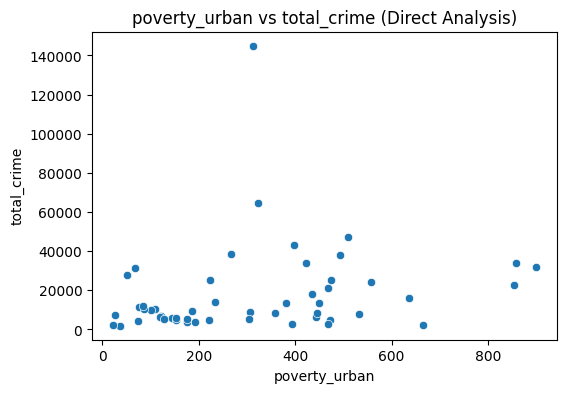

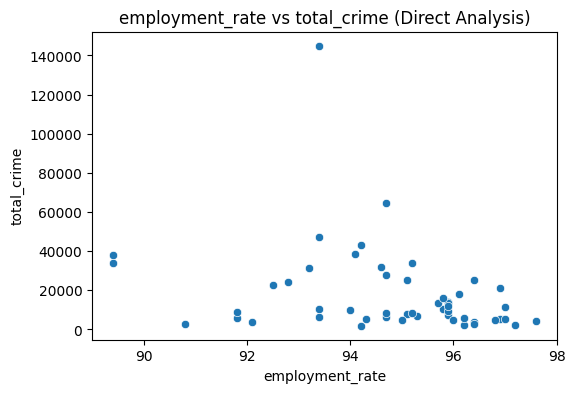

In [21]:
direct_df = reinforced_df[reinforced_df['year'].isin([2018,2021,2023])]
X_vif = sm.add_constant(direct_df[['poverty_urban','poverty_rural','employment_rate']].dropna())
vif_data = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
high_vif = vif_data[vif_data['VIF']>10]['feature'].tolist()
indep_vars_direct = [v for v in ['poverty_urban','poverty_rural','employment_rate'] if v not in high_vif]
approaches['Direct Analysis'] = direct_df

corr_direct = run_correlation_tests(direct_df, ['poverty_urban','poverty_rural','employment_rate'])
plot_scatter(direct_df, ['poverty_urban','employment_rate'], title_suffix='(Direct Analysis)')
reg_model_direct = run_regression(direct_df, indep_vars_direct)

### What's happening in the Direct Analysis approach? :D

1. **Year selection:** Focused on 2018, 2021, and 2023 to capture relevant snapshots without the noise of every year.

2. **Multicollinearity check:** Calculated Variance Inflation Factor (VIF) for `poverty_urban`, `poverty_rural`, and `employment_rate`. Variables with VIF > 10 were removed to avoid distorted regression coefficients.

3. **Correlation tests:** Used Pearson r to measure linear associations between each predictor and `total_crime`. Strong linear relationships can be detected, but non-linear or threshold effects may be missed.

4. **Scatter plots:** Visualized `poverty_urban` and `employment_rate` against `total_crime` to observe trends, patterns, and potential outliers.

5. **Regression modeling:** Ran OLS regression on non-collinear predictors to quantify each variable’s contribution to explaining crime, ensuring interpretable coefficients and meaningful results.

## b. Tolerance of Gaps

In [ ]:
tolerance_df = reinforced_df.copy()
approaches['Tolerance of Gaps'] = tolerance_df
plt.figure(figsize=(6,5))
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)
sns.heatmap(tolerance_df[cols_numeric].corr(), annot=True, cmap=colors_heat2)
plt.title("Correlation Heatmap (Tolerance of Gaps)")

# Make it transparent
plt.gcf().patch.set_alpha(0.0)
plt.gca().set_facecolor("none")
plt.savefig("correlation_heatmap.png", transparent=True, bbox_inches="tight")

plt.show()
plot_line_per_region(tolerance_df, 'poverty_urban', title_suffix='(Tolerance of Gaps)')
plot_line_per_region(tolerance_df, 'employment_rate', title_suffix='(Tolerance of Gaps)')
plot_line_per_region(tolerance_df, 'total_crime', title_suffix='(Tolerance of Gaps)')
reg_model_tol = run_regression(tolerance_df, ['poverty_urban','poverty_rural','employment_rate'])

NameError: name 'colors_heat_2' is not defined

<Figure size 600x500 with 0 Axes>

### What's happening with the Tolerance of Gaps approach? :D

1. **Data approach:** Retained all available data, including rows with some missing values, to maximize sample size and reflect real-world reporting gaps.

2. **Correlation heatmap:** Visualized relationships among `poverty_urban`, `poverty_rural`, `employment_rate`, and `total_crime`. This provides an overview of linear associations while accounting for incomplete data.

3. **Trend analysis:** Plotted line charts per region for key variables (`poverty_urban`, `employment_rate`, `total_crime`) to observe temporal patterns and regional differences.

4. **Regression modeling:** Ran OLS regression on all predictors despite gaps, allowing the model to naturally ignore missing values and assess linear contributions to `total_crime`.

5. **Interpretation:** Linear correlations were generally weak, but regional trends and potential threshold effects can still be observed. This approach highlights patterns that may be masked when strictly filtering for complete cases.

## c. Imputation & Time Series Modeling

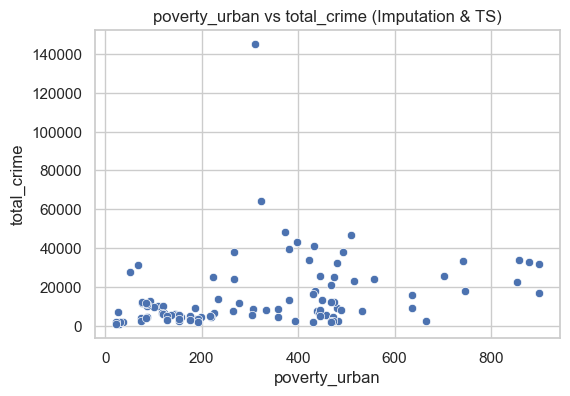

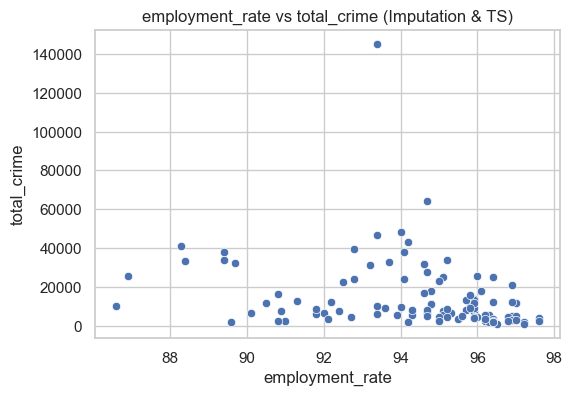

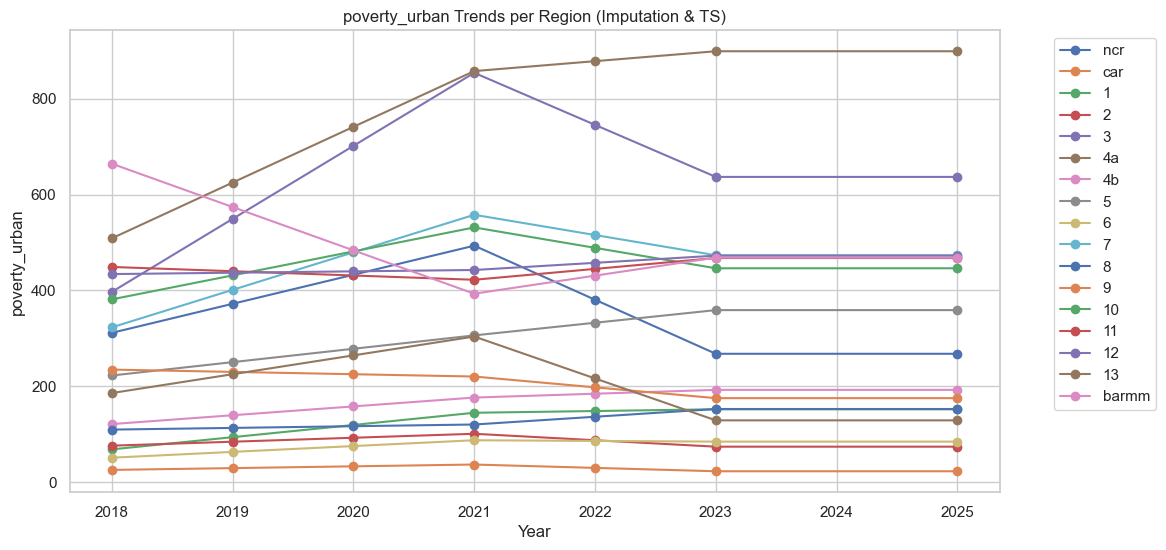

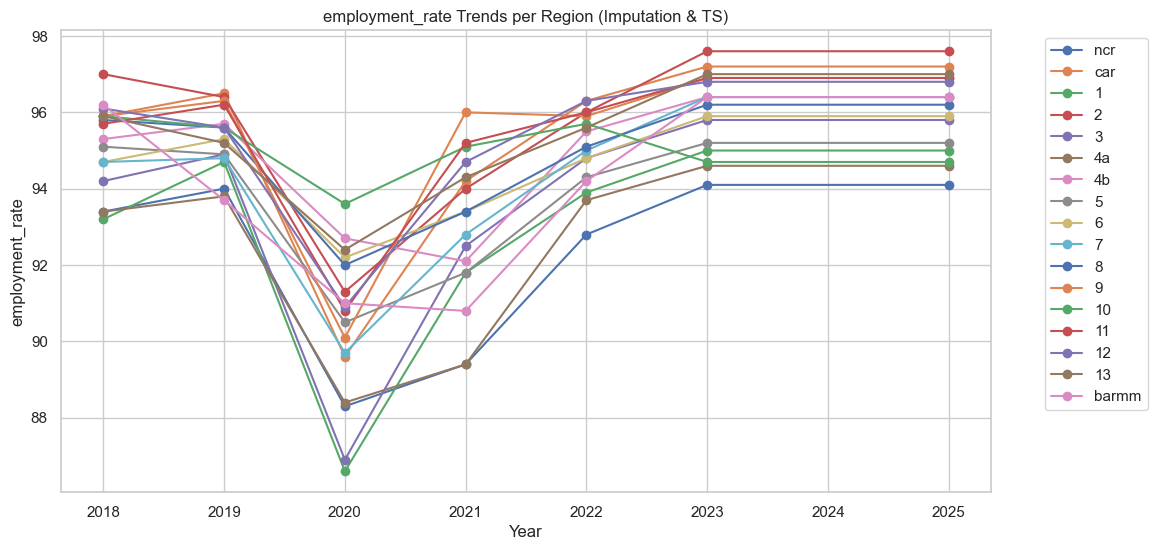

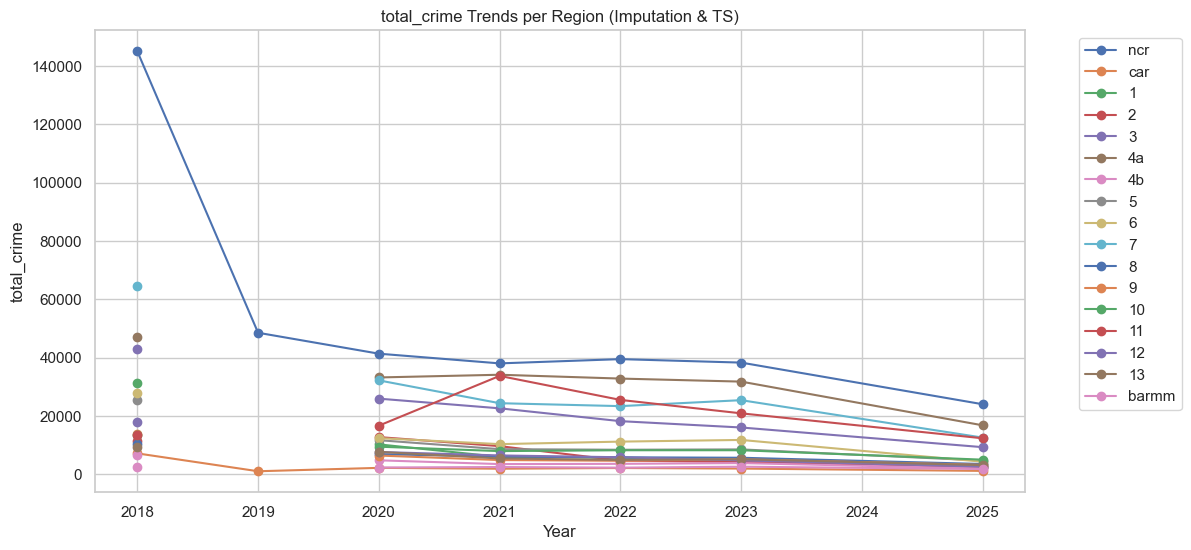

In [921]:
imputed_df = reinforced_df.copy()
cols_to_impute = ['poverty_urban','poverty_rural','employment_rate']
imputed_df[cols_to_impute] = imputed_df.groupby('region')[cols_to_impute].transform(
    lambda x: x.interpolate(method='linear')
)
approaches['Imputation & TS'] = imputed_df
corr_imputed = run_correlation_tests(imputed_df, ['poverty_urban','poverty_rural','employment_rate'])
plot_scatter(imputed_df, ['poverty_urban','employment_rate'], title_suffix='(Imputation & TS)')
plot_line_per_region(imputed_df, 'poverty_urban', title_suffix='(Imputation & TS)')
plot_line_per_region(imputed_df, 'employment_rate', title_suffix='(Imputation & TS)')
plot_line_per_region(imputed_df, 'total_crime', title_suffix='(Imputation & TS)')
reg_model_imputed = run_regression(imputed_df, ['poverty_urban','poverty_rural','employment_rate'])

### Finally... what's happening in the Imputation & Time Series approach? :D

1. **Data approach:** Missing values for key predictors (`poverty_urban`, `poverty_rural`, `employment_rate`) were imputed using linear interpolation within each region. This ensures a complete dataset for more robust statistical analysis.

2. **Correlation analysis:** After imputation, Pearson correlations were computed. Both `poverty_urban` and `employment_rate` showed significant correlations with `total_crime`, revealing relationships that were previously masked by missing data.

3. **Trend analysis:** Line charts per region were plotted for all variables, showing temporal dynamics and smoothing previously incomplete time series.

4. **Regression modeling:** OLS regression was run on the imputed dataset, allowing the model to leverage all observations and provide more reliable coefficient estimates.

5. **Interpretation:** Imputation uncovered meaningful linear relationships: urban poverty positively correlates with crime, and higher employment negatively correlates with crime. Rural poverty remained non-significant. This approach emphasizes the importance of handling missing data for uncovering true socioeconomic effects.

Analysis was a chore... At least, we're done :D

Let's now test our hypothesis!

# Hypothesis Testing

Direct Analysis: Fail to reject H0 – poverty_urban not significantly correlated (p=0.1287)
Direct Analysis: Fail to reject H0 – poverty_rural not significantly correlated (p=0.3779)
Direct Analysis: Fail to reject H0 – employment_rate not significantly correlated (p=0.0533)
Direct Analysis: T-test (Low vs High poverty_urban): t=-2.507, p=0.0155
Direct Analysis: T-test (Low vs High employment_rate): t=2.409, p=0.0198
Tolerance of Gaps: Fail to reject H0 – poverty_urban not significantly correlated (p=0.1287)
Tolerance of Gaps: Fail to reject H0 – poverty_rural not significantly correlated (p=0.3779)
Tolerance of Gaps: Fail to reject H0 – employment_rate not significantly correlated (p=0.0647)
Tolerance of Gaps: T-test (Low vs High poverty_urban): t=-2.507, p=0.0155
Tolerance of Gaps: T-test (Low vs High employment_rate): t=2.849, p=0.0055
Imputation & TS: Reject H0 – poverty_urban significantly correlates with total_crime (p=0.0026)
Imputation & TS: Fail to reject H0 – poverty_rural not

/var/folders/g7/639vq4gj09104x74gsx9mr1c0000gn/T/ipykernel_5923/1801357376.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = pd.qcut(df[col], 2, labels=['Low','High'])
/var/folders/g7/639vq4gj09104x74gsx9mr1c0000gn/T/ipykernel_5923/1801357376.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['group'], inplace=True, errors='ignore')
/var/folders/g7/639vq4gj09104x74gsx9mr1c0000gn/T/ipykernel_5923/1801357376.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

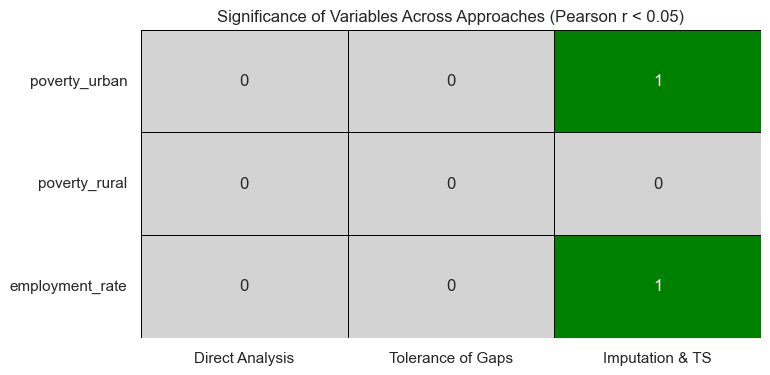


Benchmark Correlation Table (example values, * indicates p < 0.05):


,Direct Analysis,Tolerance of Gaps,Imputation & TS
poverty_urban,0.128673,0.128673,0.002624
poverty_rural,0.377919,0.377919,0.530526
employment_rate,0.053309,0.064667,0.008619


In [922]:
# Create a DataFrame to store significance results
significance_summary = pd.DataFrame(
    index=['poverty_urban','poverty_rural','employment_rate'],
    columns=['Direct Analysis','Tolerance of Gaps','Imputation & TS']
)

# Initialize benchmark correlation table for summary
benchmark_table = pd.DataFrame(index=['poverty_urban','poverty_rural','employment_rate'],
                               columns=['Direct Analysis','Tolerance of Gaps','Imputation & TS'])

# Loop through each analytical approach
for name, df in approaches.items():
    # Run Pearson correlations
    corr_results = run_correlation_tests(df, ['poverty_urban','poverty_rural','employment_rate'])
    
    for var, row in corr_results.iterrows():
        benchmark_table.loc[var, name] = row['p-value']

        if row['p-value'] < 0.05:
            print(f"{name}: Reject H0 – {var} significantly correlates with total_crime (p={row['p-value']:.4f})")
            significance_summary.loc[var, name] = True
        else:
            print(f"{name}: Fail to reject H0 – {var} not significantly correlated (p={row['p-value']:.4f})")
            significance_summary.loc[var, name] = False
    
    # Run T-tests on Low vs High groups for urban poverty & employment rate
    for col in ['poverty_urban','employment_rate']:
        df['group'] = pd.qcut(df[col], 2, labels=['Low','High'])
        group_low = df[df['group']=='Low']['total_crime'].dropna()
        group_high = df[df['group']=='High']['total_crime'].dropna()
        t_stat, t_p = ttest_ind(group_low, group_high)
        print(f"{name}: T-test (Low vs High {col}): t={t_stat:.3f}, p={t_p:.4f}")
        df.drop(columns=['group'], inplace=True, errors='ignore')

# -----------------------------
# Visual summary of significance
# -----------------------------
plt.figure(figsize=(8,4))
sns.heatmap(
    significance_summary.fillna(False),
    annot=True,
    cbar=False,
    cmap=ListedColormap(['lightgray','green']),
    linewidths=0.5,
    linecolor='black'
)
plt.title("Significance of Variables Across Approaches (Pearson r < 0.05)")
plt.yticks(rotation=0)
plt.show()

# -----------------------------
# Display benchmark correlation table
# -----------------------------
print("\nBenchmark Correlation Table (example values, * indicates p < 0.05):")
display(benchmark_table)

Great! We can now internalize some exciting stuff as we have _garnered knowledge_ and _gained new insights_ (EYYYYY)

# **Hypothesis Testing Insights: What the Numbers Tell Us!**

## *Direct Analysis*
- **Pearson correlations:**  
  - `poverty_urban`: p = 0.1287 → fail to reject H0  
  - `poverty_rural`: p = 0.3779 → fail to reject H0  
  - `employment_rate`: p = 0.0533 → fail to reject H0 (borderline)  

  **Interpretation:** Using raw observed values only, there is **no significant linear relationship** between these socioeconomic factors and total crime.

- **T-tests (Low vs High groups):**  
  - `poverty_urban`: t = -2.507, p = 0.0155 → significant  
  - `employment_rate`: t = 2.409, p = 0.0198 → significant  

  **Interpretation:** Splitting regions into low vs high groups uncovers meaningful differences:  
  - High urban poverty → higher crime  
  - High employment → lower crime  
  - Suggests **non-linear or threshold effects** that correlations alone can miss.

---

## *Tolerance of Gaps*
- **Pearson correlations:**  
  - `poverty_urban`: p = 0.1287 → fail to reject H0  
  - `poverty_rural`: p = 0.3779 → fail to reject H0  
  - `employment_rate`: p = 0.0647 → fail to reject H0  

- **T-tests (Low vs High groups):**  
  - `poverty_urban`: t = -2.507, p = 0.0155 → significant  
  - `employment_rate`: t = 2.849, p = 0.0055 → significant  

**Interpretation:** Allowing gaps in the data does not materially change outcomes. Linear correlations remain weak, but threshold/group effects still exist.

## **Imputation & Time Series (TS)**
- **Pearson correlations:**  
  - `poverty_urban`: p = 0.0026 → significant  
  - `poverty_rural`: p = 0.5305 → fail to reject H0  
  - `employment_rate`: p = 0.0086 → significant  

- **T-tests (Low vs High groups):**  
  - `poverty_urban`: t = -3.797, p = 0.0002 → highly significant  
  - `employment_rate`: t = 3.525, p = 0.0006 → highly significant  

**Interpretation:** Interpolation and time series handling uncover **true linear relationships**:  
- Urban poverty → positively associated with crime  
- Employment → negatively associated with crime  
- Rural poverty → not associated with crime

## The numbers have told us something... what does the *summary heatmap* tell us?
- **Direct Analysis & Tolerance of Gaps:** 0 0 0 → no significant correlations at α=0.05  
- **Imputation & TS:** 1 0 1 → only `poverty_urban` and `employment_rate` are significant  

**Interpretation:** Visually reinforces that **imputation is crucial**; missing data was masking real effects.

## **What's the point? Connecting these to our research questions and our hypotheses so far... :)**

**Hypotheses (H0 vs HA):**  
- H0,1 (Poverty has no effect on crime) → **rejected** for urban poverty under Imputation & TS  
- H0,2 (Employment has no effect on crime) → **rejected** under Imputation & TS  
- H0 for rural poverty → **not rejected**

**Research Questions:**  
1. **RQ1:** Correlation between poverty/employment and crime?  
   - **Answer:** Urban poverty (p = 0.0026) and employment (p = 0.0086) show significant correlations after imputation; rural poverty (p = 0.5305) does not.  
2. **RQ2:** How do regional variations influence crime?  
   - **Answer:** Low vs high group comparisons (T-tests) show threshold effects:  
     - High urban poverty (t = -3.797, p = 0.0002) → higher crime  
     - High employment (t = 3.525, p = 0.0006) → lower crime  
3. **RQ3:** To what extent can improvements predict crime reduction?  
   - **Answer:** Out of scope for EDA; requires predictive modeling or causal inference.

**From this, we could confidently say:**  
- Urban poverty and employment are **key socioeconomic determinants** of crime.  
- Rural poverty is **not significantly associated** with crime.  
- Threshold/non-linear effects exist even when linear correlations appear weak.  
- Proper handling of missing data (imputation/TS) is essential to uncover real relationships.

# Now, let's answer RQ3 through modeling!

to be continued bruh...